In [1]:
import tweepy
import networkx as nx
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

In [2]:
#Twitter API credentials
consumer_key = "PQ4k3UDxKOYcNhQ735Dfu1o62"
consumer_secret = "jKEPIgwuRreqK3V2ZZU5NFxN1qW5lws2ryKhHbzM3AUcdFCjPk"
access_key = "796196323204558849-PF94S7BlbuFbLeSUBrfck2cAWbM95YM"
access_secret = "7gwsLnnMhqN6ZL85ICGR4tJ1X0cQ7zBMBL7rI8EZj7btc"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [4]:
alltweets = []
new_tweets = api.user_timeline(screen_name = 'kdnuggets',count=200)

In [5]:
alltweets.extend(new_tweets)

In [6]:
oldest = alltweets[-1].id - 1

In [7]:
while len(new_tweets) > 0:
    print ("getting tweets before %s" % (oldest))
    #all subsiquent requests use the max_id param to prevent duplicates
    new_tweets = api.user_timeline(screen_name = 'kdnuggets',count=200,max_id=oldest)
        
    #save most recent tweets
    alltweets.extend(new_tweets)

    #update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    print ("...%s tweets downloaded so far" % (len(alltweets)))

#transform the tweepy tweets into a 2D array that will populate the csv	
outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]

getting tweets before 994218937238900735
...400 tweets downloaded so far
getting tweets before 990001908499861503
...600 tweets downloaded so far
getting tweets before 987386669484662783
...800 tweets downloaded so far
getting tweets before 984536851359944704
...1000 tweets downloaded so far
getting tweets before 981879480267476991
...1200 tweets downloaded so far
getting tweets before 979082955011354624
...1400 tweets downloaded so far
getting tweets before 976760455116050431
...1600 tweets downloaded so far
getting tweets before 974223689855193094
...1800 tweets downloaded so far
getting tweets before 971838299785572354
...2000 tweets downloaded so far
getting tweets before 969331671823773698
...2200 tweets downloaded so far
getting tweets before 966824181466828799
...2400 tweets downloaded so far
getting tweets before 963793480098213887
...2600 tweets downloaded so far
getting tweets before 961273367218278399
...2800 tweets downloaded so far
getting tweets before 958712751425249279


In [8]:
count = 0
tweet_text=[]
for tweet in alltweets:
    count = count + 1
    tweet_text.append(tweet.text.encode("utf-8"))
tweet_text[:10]
#print(count)

[b'An Introduction to Deep Learning for Tabular Data https://t.co/kQMTVbUflU https://t.co/3Hk6G4NnjS',
 b'How to Implement a YOLO (v3) Object Detector from Scratch in PyTorch: Part 1 https://t.co/kQH4glBjIP https://t.co/ThxRuSAuGJ',
 b'Modern Data Science Workflows, May 24 https://t.co/ALyjQUxZsm',
 b'Top KDnuggets tweets, May 09-15: Top 100 Books for #DataScientists; 7 Books to Grasp Mathematical Foundations of\xe2\x80\xa6 https://t.co/llhAtY7enL',
 b'Learn Business Analytics at Clark University \xe2\x80\x93 affordable excellence https://t.co/9ENBQyW3MR https://t.co/lXtI3cfc8M',
 b'AI Leaders Summit, Boston, June 21-22, KDnuggets Offer https://t.co/HOl1qfAK3Q https://t.co/Ju6PT2tpOJ',
 b'How to Organize Data Labeling for Machine Learning: Approaches and Tools https://t.co/e8fYUcFj8H https://t.co/f71zVGBfrl',
 b'GANs in TensorFlow from the Command Line: Creating Your First GitHub Project https://t.co/rGrrOeAOQ3 https://t.co/U9hJMT4hAY',
 b'2018 was deadlier for US schoolchildren than f

In [9]:
import string
from collections import Counter
import nltk
import re

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
lStopwords = set(stopwords.words("english"))
tokens = []
tokenizer = RegexpTokenizer(r'\w+')
stemmer = nltk.stem.PorterStemmer()
lPunct = list(string.punctuation)
#lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['rt', 'via']
lStopwords1 = ['"', "'", '“', '’', '…', '”']

tokens = []
lines = []
regexHashTags = re.compile("^#\w+")
regexHttp = re.compile("^http")

more_stopwords = ['co','b','n','rt','vs']


for text in tweet_text:
    text = str(text.lower())
    lines.append(text)
    ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    
    lTokens = tokenizer.tokenize(text)
    for tok in lTokens:
        if tok not in lStopwords and not tok.isdigit() and tok.isalpha() and regexHashTags.match(tok) == None and regexHttp.match(tok) == None:
            if (tok not in more_stopwords):
                tokens.append(tok)

    #for tok in lStemmedTokens:
        #if tok not in lStopwords and not tok.isdigit() and regexHashTags.match(tok) == None and regexHttp.match(tok) == None:
            #tokens.append(tok)
            

In [11]:
termFreqCounter = Counter()
termFreqCounter.update(tokens)

In [12]:
freqNum = 20
print ("Most common terms\n")
sorted_wf = {}
for term, count in termFreqCounter.most_common(freqNum):
    print(term + ': ' + str(count))
    sorted_wf.update(dict(term=count))

Most common terms

kdn: 1017
machinelearning: 735
datascience: 587
data: 407
ai: 388
deeplearning: 328
top: 325
python: 282
kdnuggets: 182
analytics: 146
datascientist: 143
learning: 140
job: 134
using: 130
learn: 120
bigdata: 120
amp: 111
part: 102
tensorflow: 100
datascientists: 98


In [13]:
word_freq = dict([term,count] for term,count in termFreqCounter.most_common(10))
print (word_freq)

{'kdn': 1017, 'machinelearning': 735, 'datascience': 587, 'data': 407, 'ai': 388, 'deeplearning': 328, 'top': 325, 'python': 282, 'kdnuggets': 182, 'analytics': 146}


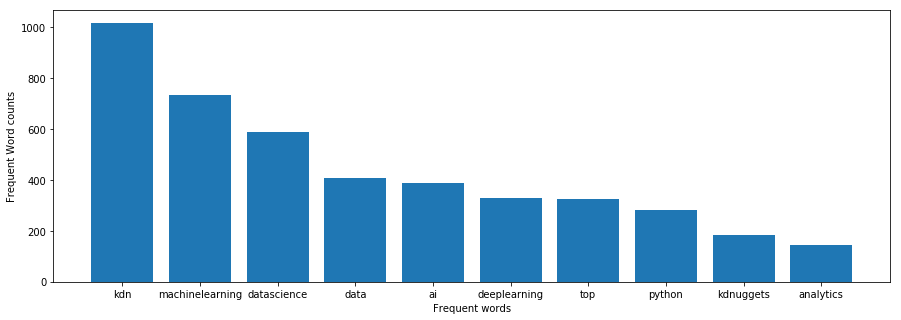

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(range(len(word_freq)), word_freq.values(), align='center')
plt.xticks(range(len(word_freq)), list(word_freq.keys()))
plt.ylabel('Frequent Word counts')
plt.xlabel('Frequent words')
plt.show()

In [15]:
#Topic Modelling

no_features = 1500
tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tfVectorizer.fit_transform(tokens)
# extract the names of the features (in our case, the words)
tfFeatureNames = tfVectorizer.get_feature_names()

In [16]:
ldaModel = LatentDirichletAllocation(n_components=10, max_iter=10, learning_method='online').fit(tf)

In [18]:
def display_topics(model, featureNames, numTopWords):
    """
    Prints out the most associated words for each feature.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    @param numTopWords: number of words to print per topic.
    """

    # print out the topic distributions
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [19]:
display_topics(ldaModel, tfFeatureNames, 3)

Topic 0:
datascientist bigdata google
Topic 1:
learning datascientists best
Topic 2:
machinelearning learn need
Topic 3:
python tensorflow know
Topic 4:
guide world research
Topic 5:
datascience deeplearning new
Topic 6:
data analytics use
Topic 7:
ai job neuralnetworks
Topic 8:
kdn kdnuggets using
Topic 9:
analysis observer explained


In [20]:
import math
import matplotlib.pyplot as plt
def displayWordcloud(model, featureNames):
    # this normalises each row/topic to sum to one
    # use this normalisedComponents to display your wordclouds
    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]

    topicNum = len(model.components_)
    # number of wordclouds for each row
    plotColNum = 3
    # number of wordclouds for each column
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='black')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.show(block=True)

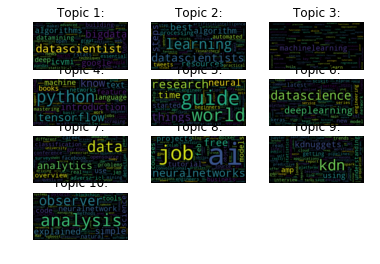

In [21]:
displayWordcloud(ldaModel, tfFeatureNames)

In [24]:
import pyLDAvis.sklearn
panel = pyLDAvis.sklearn.prepare(ldaModel, tf, tfVectorizer, mds='tsne')


C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [25]:
pyLDAvis.show(panel)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [20/May/2018 19:55:01] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2018 19:55:02] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2018 19:55:02] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2018 19:55:02] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...


In [26]:
def all_pairs(items):
    """Make all unique pairs (order doesn't matter)"""
    pairs = []
    nitems = len(items)
    for i, wi in enumerate(items):
        for j in range(i+1, nitems):
            pairs.append((wi, items[j]))
    return pairs

In [27]:
#Co Occurence Graph
def co_occurrences(lines, words):
    """Return histogram of co-occurrences of words in a list of lines.
    Parameters
    ----------
    lines : list
      A list of strings considered as 'sentences' to search for co-occurrences.
    words : list
      A list of words from which all unordered pairs will be constructed and
      searched for co-occurrences.
    """
    wpairs = all_pairs(words)

    # Now build histogram of co-occurrences
    co_occur = {}
    for w1, w2 in wpairs:
        rx = re.compile('%s .*%s|%s .*%s' % (w1, w2, w2, w1))
        co_occur[w1, w2] = sum([1 for line in lines if rx.search(line)])

    return co_occur




In [28]:
def co_occurrences_graph(word_hist, co_occur, cutoff=0):
    """Convert a word histogram with co-occurrences to a weighted graph.
    Edges are only added if the count is above cutoff.
    """
    
    g = nx.Graph()
    for word in word_hist:
        g.add_node(word)
    for (w1, w2), count in co_occur.items():
        if count<=cutoff:
            continue
        g.add_edge(w1, w2, weight=count)
    return g

# Hack: offset the most central node to avoid too much overlap
rad0 = 0.3

In [29]:
popular = dict([term,count] for term,count in termFreqCounter.most_common(10))
pop_words = [wc for wc in popular]
co_occur = co_occurrences(lines, pop_words)
wgraph = co_occurrences_graph(popular, co_occur, cutoff=1)

In [30]:
centrality = nx.eigenvector_centrality_numpy(wgraph)

In [31]:
def summarize_centrality(centrality):
    c = centrality.items()
    sorted(c,key=lambda x:x[1], reverse=True)
    print ('\nGraph centrality')
    for node, cent in c:
        print ("%15s: %.3g" % (node, float(cent)))

In [32]:
summarize_centrality(centrality)


Graph centrality
            kdn: 0.501
machinelearning: 0.443
    datascience: 0.328
           data: 0.355
             ai: 0.23
   deeplearning: 0.167
            top: 0.381
         python: 0.229
      kdnuggets: 0.18
      analytics: 0.0886


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:511: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:532: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:712: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


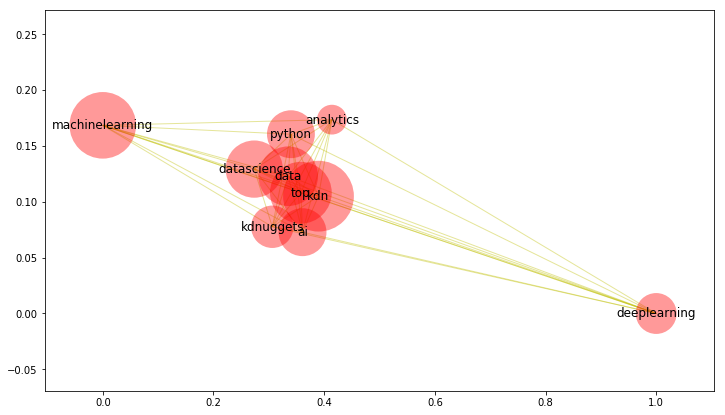

In [38]:
plt.rc('figure', figsize=(12, 7))
wgraph.remove_nodes_from([n for n in centrality if centrality[n] == .0])
node_size = [centrality[n]*10000 for n in wgraph]
pos = nx.spring_layout(wgraph)
nx.draw_networkx(wgraph, pos, node_size=node_size, edge_color='y', alpha=.4, linewidths=0)